In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import warnings
from datetime import datetime
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('marketing_campaign.csv')

In [3]:
df.head(5)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,4/9/2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,8/3/2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10/2/2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [5]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [6]:
df.clip()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,4/9/2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,8/3/2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10/2/2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10/6/2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


In [7]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
2235    False
2236    False
2237    False
2238    False
2239    False
Length: 2240, dtype: bool

In [8]:
df.isnull()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2236,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2237,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2238,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [9]:
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [10]:
df['Income'].fillna(df['Income'].mean(),inplace=True)


In [11]:
df.dropna()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,4/9/2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,8/3/2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10/2/2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10/6/2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


# distribution of customer education level

In [12]:
education_level_distribution = df['Education'].value_counts()
education_level_distribution

Education
Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: count, dtype: int64

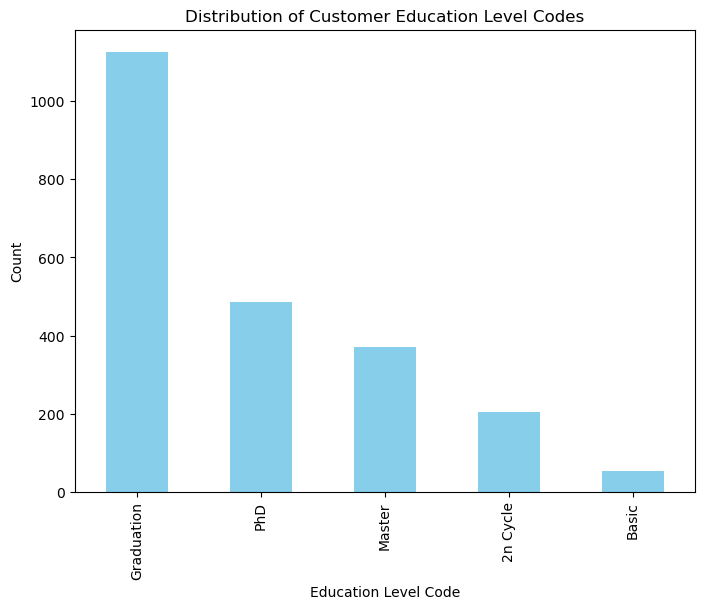

In [13]:
plt.figure(figsize=(8, 6))
education_level_distribution.plot(kind='bar', color='skyblue')
plt.title('Distribution of Customer Education Level Codes')
plt.xlabel('Education Level Code')
plt.ylabel('Count')
plt.show()

# martial status vary among customers

In [14]:
marital_status_distribution = df['Marital_Status'].value_counts()
marital_status_distribution

Marital_Status
Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64

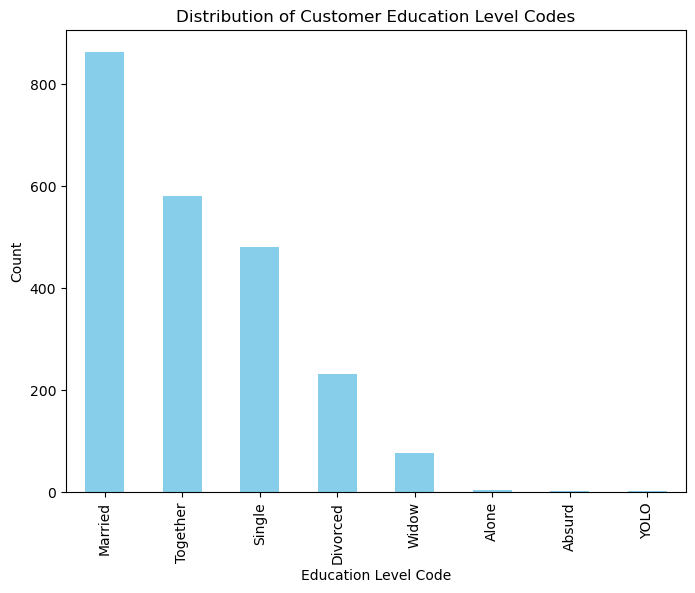

In [15]:
plt.figure(figsize=(8, 6))
marital_status_distribution.plot(kind='bar', color='skyblue')
plt.title('Distribution of Customer Education Level Codes')
plt.xlabel('Education Level Code')
plt.ylabel('Count')
plt.show()

In [16]:
average_income=df['Income'].mean()
average_income

52247.25135379061

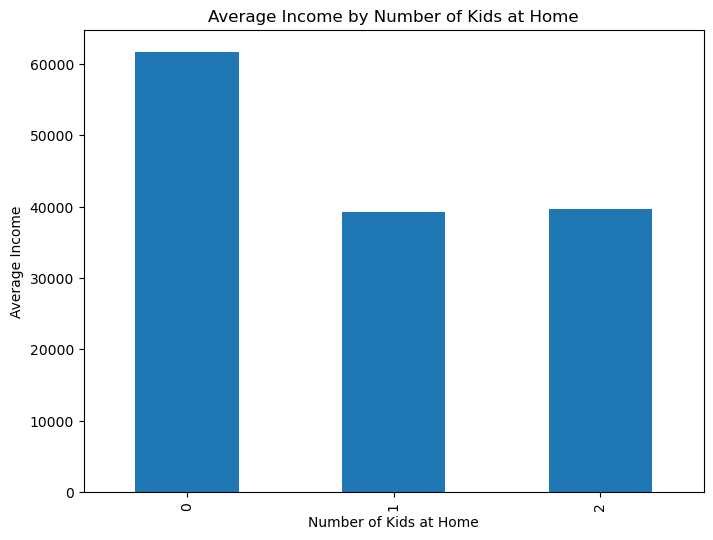

In [17]:
income_by_kids = df.groupby('Kidhome')['Income'].mean()
plt.figure(figsize=(8, 6))
income_by_kids.plot(kind='bar')
plt.title('Average Income by Number of Kids at Home')
plt.xlabel('Number of Kids at Home')
plt.ylabel('Average Income')
plt.show()

<Axes: xlabel='Income', ylabel='Density'>

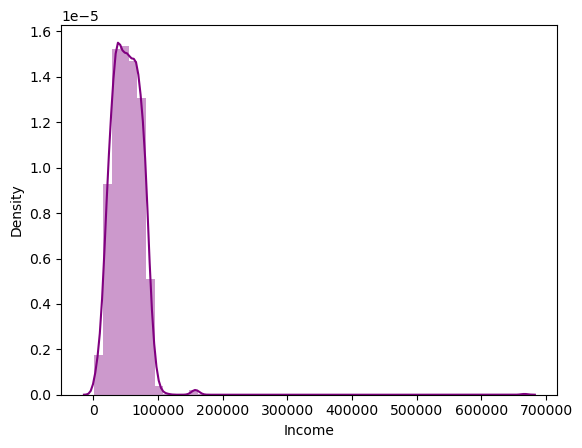

In [18]:
sns.distplot(df['Income'],color='purple')

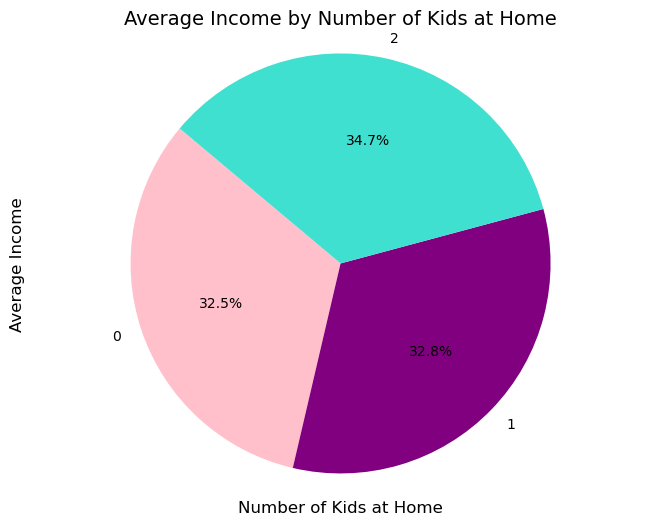

In [19]:
# Calculate the mean income by number of kids at home
income_by_kids = df.groupby('Teenhome')['Income'].mean()

# Define custom colors for the pie chart
colors = ['pink', 'purple', 'turquoise']
plt.figure(figsize=(8, 6))
income_by_kids.plot(kind='pie', colors=colors, autopct='%1.1f%%', startangle=140)

# Adding title and labels
plt.title('Average Income by Number of Kids at Home', fontsize=14)
plt.xlabel('Number of Kids at Home', fontsize=12)
plt.ylabel('Average Income', fontsize=12)

# Display the plot
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [20]:
income_by_martialstatus = df.groupby('Marital_Status')['Income'].mean()
income_by_martialstatus

Marital_Status
Absurd      72365.500000
Alone       43789.000000
Divorced    52834.228448
Married     51729.210370
Single      51018.823463
Together    53233.485792
Widow       56426.561706
YOLO        48432.000000
Name: Income, dtype: float64

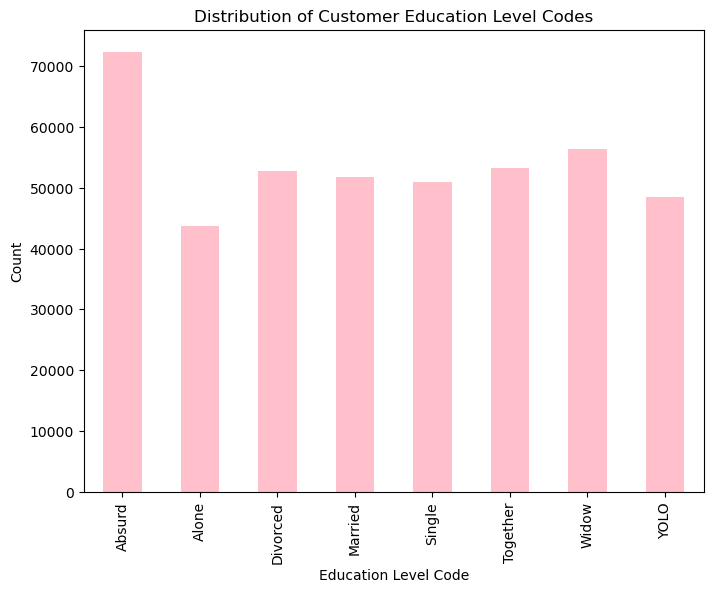

In [21]:
plt.figure(figsize=(8, 6))
income_by_martialstatus.plot(kind='bar', color='pink')
plt.title('Distribution of Customer Education Level Codes')
plt.xlabel('Education Level Code')
plt.ylabel('Count')
plt.show()

In [22]:
income_by_Education = df.groupby('Education')['Income'].mean()
income_by_Education

Education
2n Cycle      47701.378099
Basic         20306.259259
Graduation    52715.755781
Master        52908.476370
PhD           56105.210405
Name: Income, dtype: float64

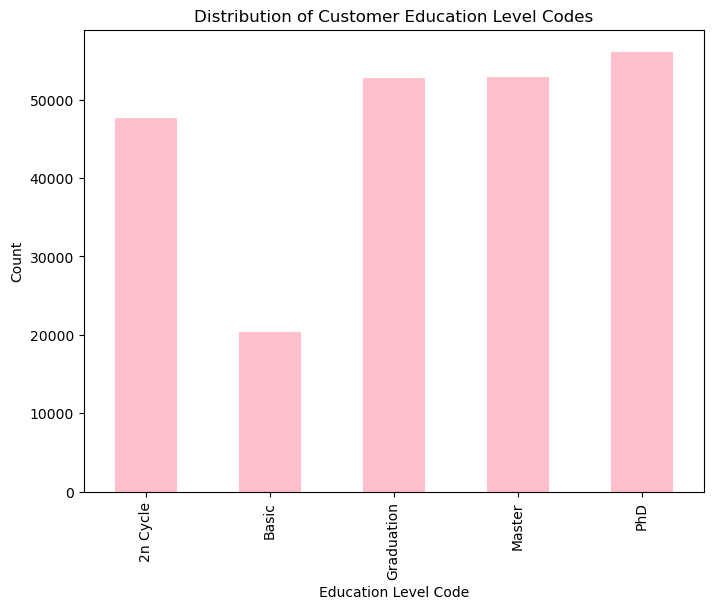

In [23]:
plt.figure(figsize=(8, 6))
income_by_Education.plot(kind='bar', color='pink')
plt.title('Distribution of Customer Education Level Codes')
plt.xlabel('Education Level Code')
plt.ylabel('Count')
plt.show()

In [24]:
# Clean and preprocess the 'Dt_Customer' column (example: replacing '/' with '-')
df['Dt_Customer'] = df['Dt_Customer'].str.replace('/', '-')

# Convert 'Dt_Customer' column to datetime format with specific format and error handling
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%d-%m-%Y', errors='coerce')

# Get the current date
current_date = pd.to_datetime(datetime.now().date())

# Calculate recency in days
df['Recency'] = (current_date - df['Dt_Customer']).dt.days

# Display 'Dt_Customer' and 'Recency' columns
print(df[['Dt_Customer', 'Recency']])

     Dt_Customer  Recency
0     2012-09-04     4252
1     2014-03-08     3702
2     2013-08-21     3901
3     2014-02-10     3728
4     2014-01-19     3750
...          ...      ...
2235  2013-06-13     3970
2236  2014-06-10     3608
2237  2014-01-25     3744
2238  2014-01-24     3745
2239  2012-10-15     4211

[2240 rows x 2 columns]


In [25]:
correlation = df['Recency'].corr(df['Income'])
correlation

-0.018459657536445878

In [26]:
columns_of_interest = ['Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'Complain', 
                       'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 
                       'MntSweetProducts', 'MntGoldProds']
correlation_matrix = df[columns_of_interest].corr()
correlation_matrix

,Year_Birth,Income,Kidhome,Teenhome,Recency,Complain,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
Year_Birth,1.000000,-0.160942,0.230176,-0.352111,0.022431,-0.030128,-0.157773,-0.017917,-0.030872,-0.041625,-0.018133,-0.061818
Income,-0.160942,1.000000,-0.425176,0.019018,-0.018460,-0.027223,0.576789,0.428747,0.577802,0.437497,0.436162,0.321978
Kidhome,0.230176,-0.425176,1.000000,-0.036133,-0.053343,0.040207,-0.496297,-0.372581,-0.437129,-0.387644,-0.370673,-0.349595
Teenhome,-0.352111,0.019018,-0.036133,1.000000,0.017465,0.003138,0.004846,-0.176764,-0.261160,-0.204187,-0.162475,-0.021725
Recency,0.022431,-0.018460,-0.053343,0.017465,1.000000,0.033120,0.166264,0.066928,0.092713,0.080769,0.081268,0.159596
Complain,-0.030128,-0.027223,0.040207,0.003138,0.033120,1.000000,-0.039007,-0.005166,-0.023483,-0.020953,-0.022485,-0.030861
MntWines,-0.157773,0.576789,-0.496297,0.004846,0.166264,-0.039007,1.000000,0.389637,0.562667,0.399753,0.386581,0.387516
MntFruits,-0.017917,0.428747,-0.372581,-0.176764,0.066928,-0.005166,0.389637,1.000000,0.543105,0.594804,0.567164,0.392995
MntMeatProducts,-0.030872,0.577802,-0.437129,-0.261160,0.092713,-0.023483,0.562667,0.543105,1.000000,0.568402,0.523846,0.350609
MntFishProducts,-0.041625,0.437497,-0.387644,-0.204187,0.080769,-0.020953,0.399753,0.594804,0.568402,1.000000,0.579870,0.422875


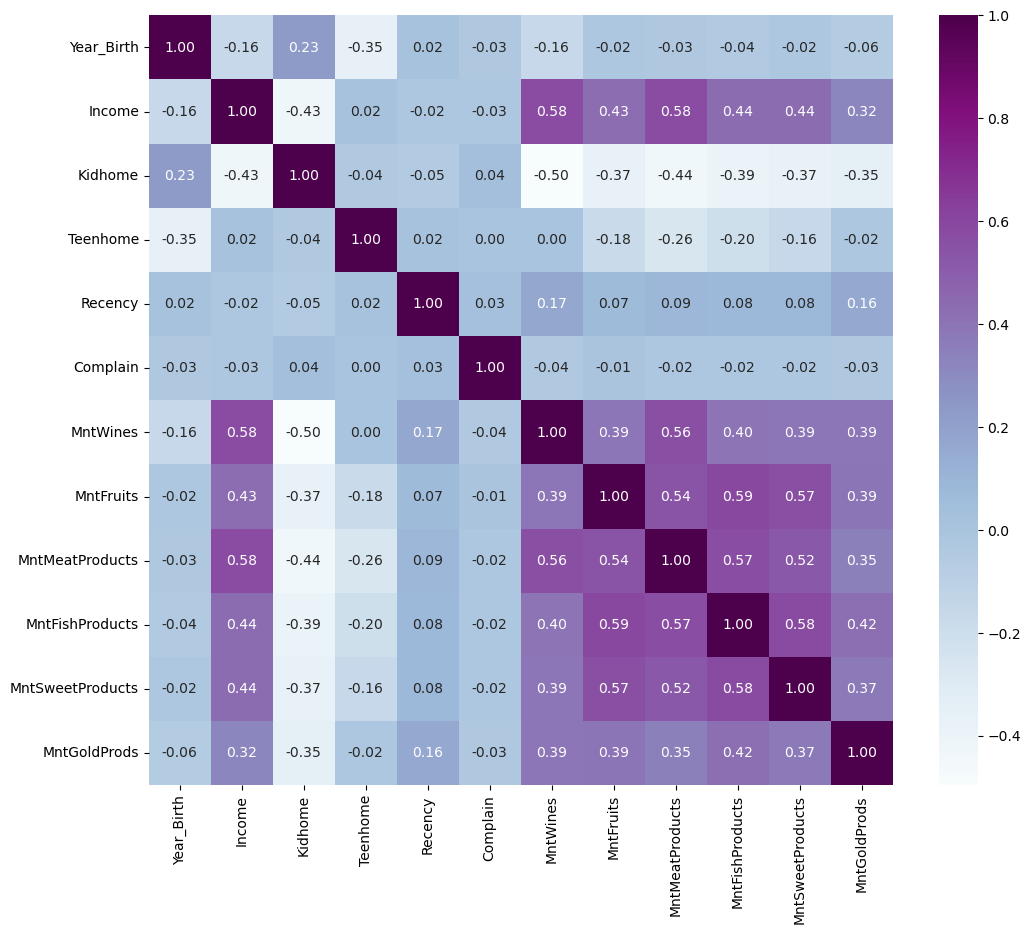

In [27]:
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='BuPu', fmt=".2f")
plt.show()

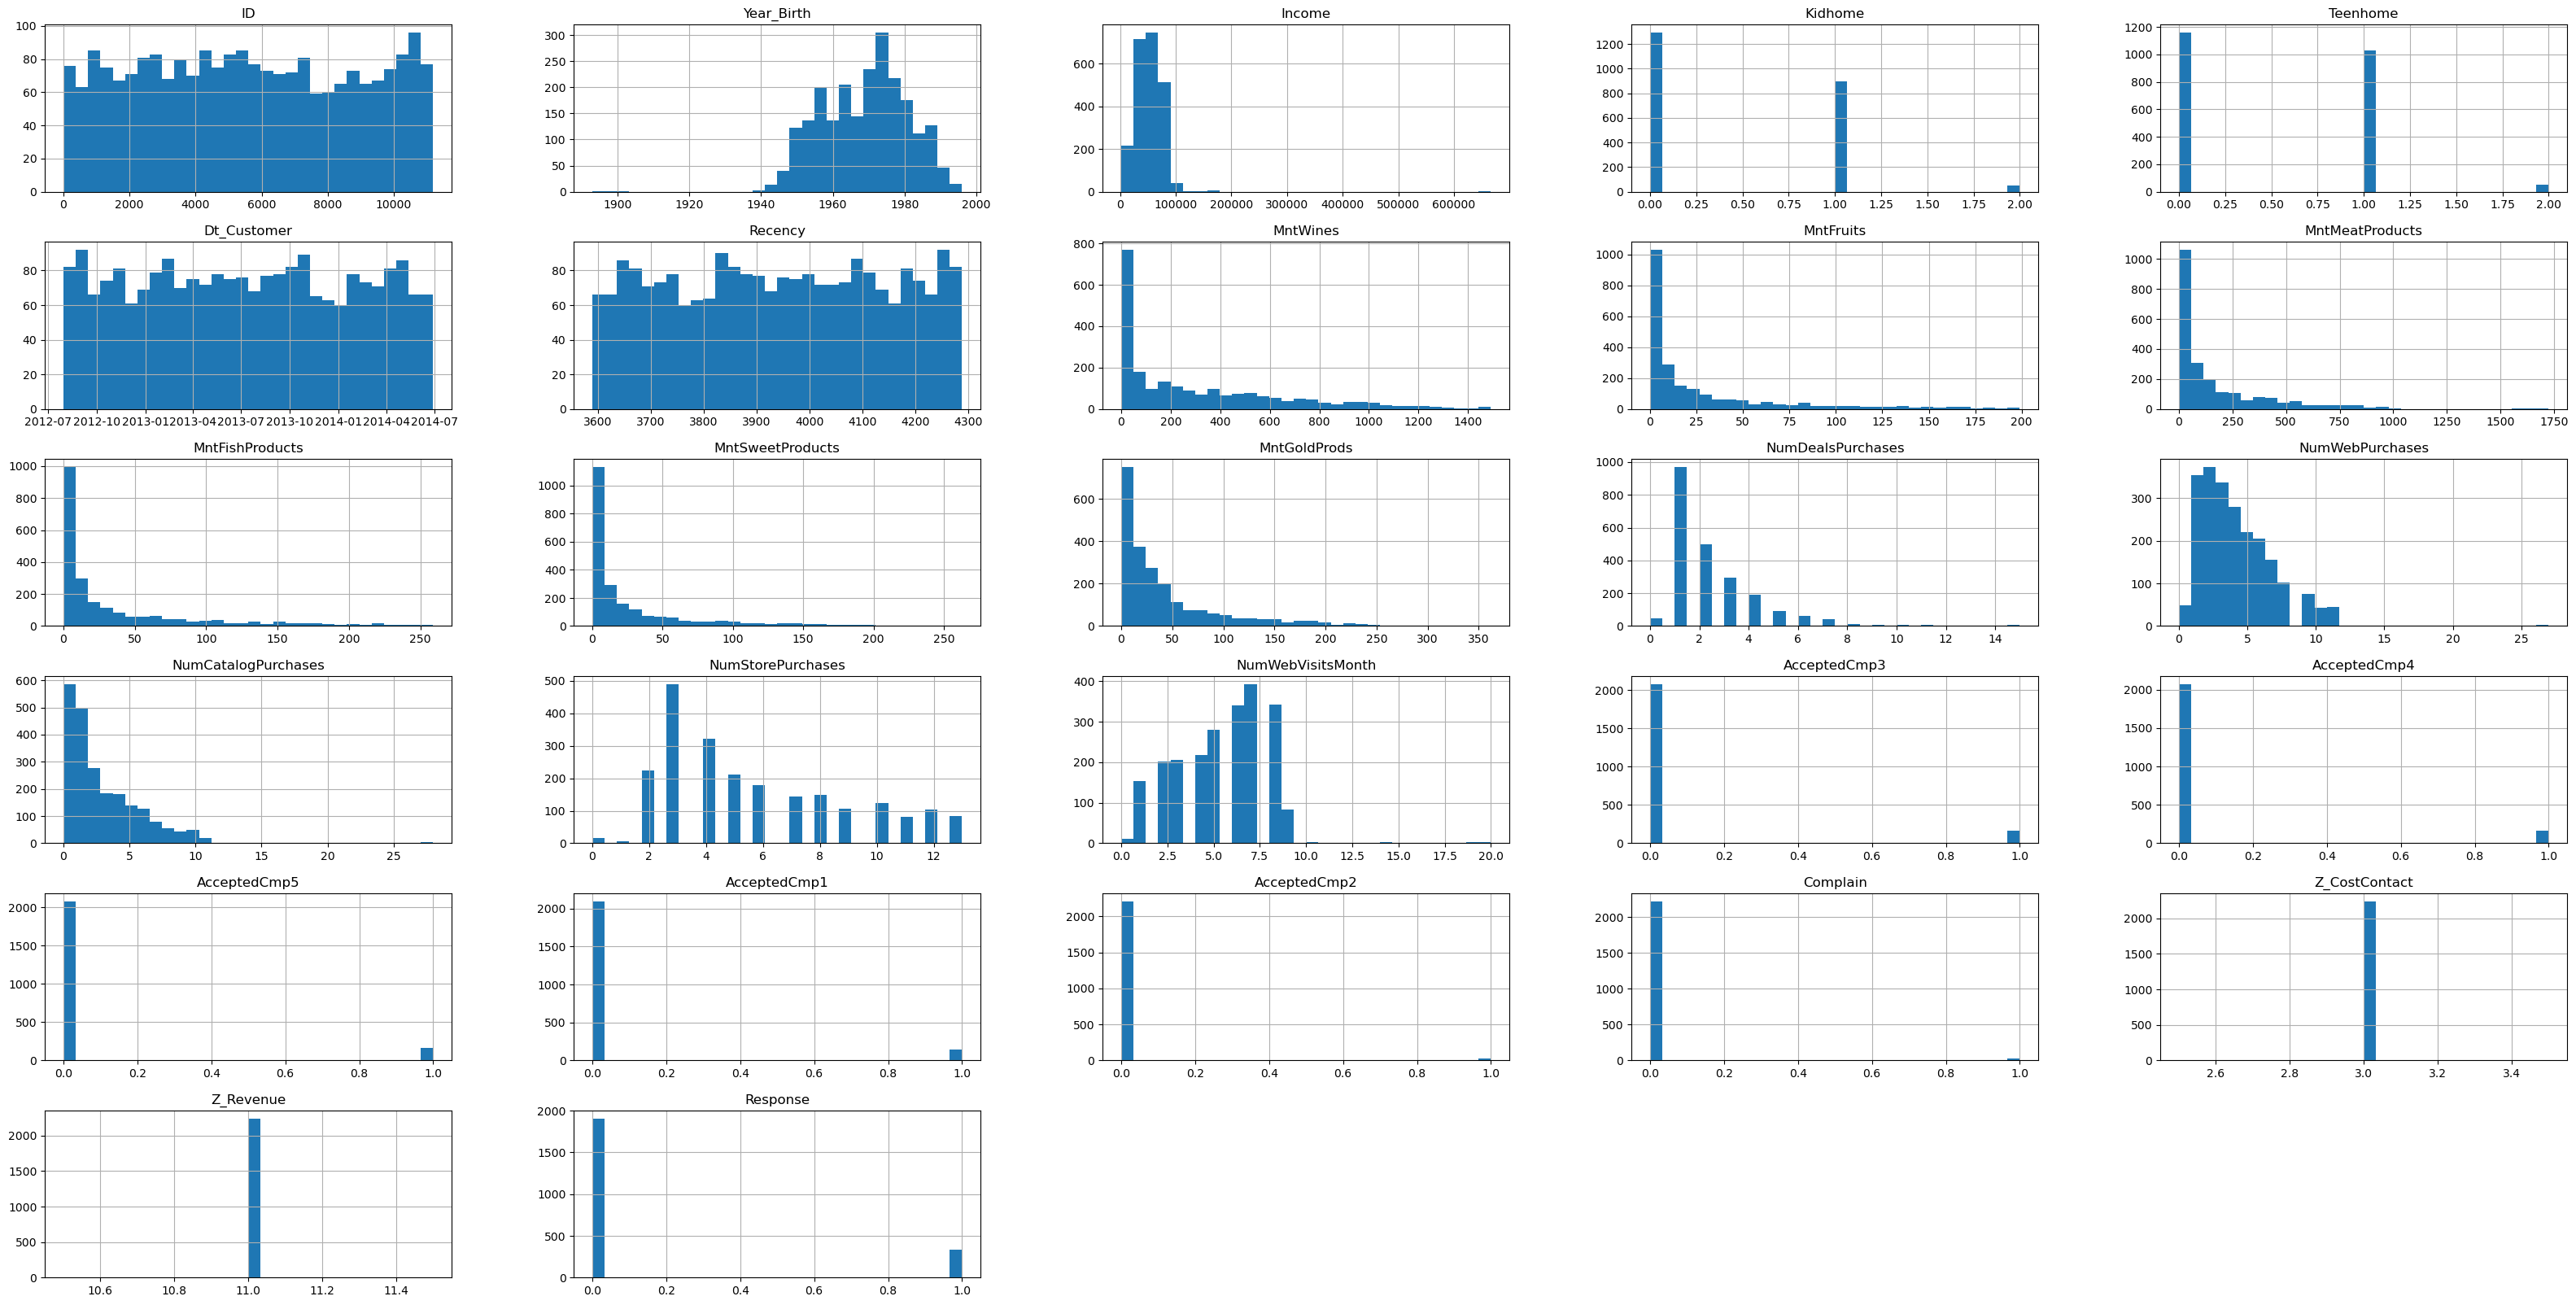

In [28]:
df.hist(bins=30, figsize=(40, 20))
plt.show()

In [29]:
maxincome=df['Income'].std()*3

In [30]:
df[df['Income']>maxincome +5000]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
15,2114,1946,PhD,Single,82800.0,0,0,2012-11-24,4171,1006,...,3,0,0,1,1,0,0,3,11,1
29,1966,1965,PhD,Married,84618.0,0,0,2013-11-22,3808,684,...,2,0,0,1,0,0,0,3,11,0
53,2225,1977,Graduation,Divorced,82582.0,0,0,2014-06-07,3611,510,...,1,1,0,0,1,0,0,3,11,1
55,6260,1955,Master,Together,82384.0,0,0,2012-11-19,4176,984,...,1,0,0,1,0,0,0,3,11,1
67,9369,1979,2n Cycle,Single,88194.0,0,1,2014-03-19,3691,688,...,5,1,0,0,1,0,0,3,11,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2193,8722,1957,2n Cycle,Married,82347.0,0,0,2012-11-06,4189,556,...,3,1,0,0,1,0,0,3,11,1
2211,10469,1981,Graduation,Together,88325.0,0,0,2014-02-05,3733,519,...,2,0,0,0,0,0,0,3,11,0
2213,3661,1995,2n Cycle,Single,80617.0,0,0,2012-10-12,4214,594,...,2,0,0,0,0,0,0,3,11,0
2217,9589,1948,PhD,Widow,82032.0,0,0,2014-04-05,3674,332,...,1,0,0,0,0,0,0,3,11,0


In [31]:
amounts=df.columns.tolist()[9:15]

In [32]:
df[amounts].sum()

MntWines            680816
MntFruits            58917
MntMeatProducts     373968
MntFishProducts      84057
MntSweetProducts     60621
MntGoldProds         98609
dtype: int64

In [33]:
df.Response.value_counts()

Response
0    1906
1     334
Name: count, dtype: int64

In [34]:
coupons=df.columns.tolist()[20:25]
df[coupons].sum()

AcceptedCmp3    163
AcceptedCmp4    167
AcceptedCmp5    163
AcceptedCmp1    144
AcceptedCmp2     30
dtype: int64

In [35]:
df['AcceptedCmp3'].value_counts()

AcceptedCmp3
0    2077
1     163
Name: count, dtype: int64

In [36]:
df['NumCatalogPurchases'].value_counts()

NumCatalogPurchases
0     586
1     497
2     276
3     184
4     182
5     140
6     128
7      79
8      55
10     48
9      42
11     19
28      3
22      1
Name: count, dtype: int64

<Axes: xlabel='NumCatalogPurchases'>

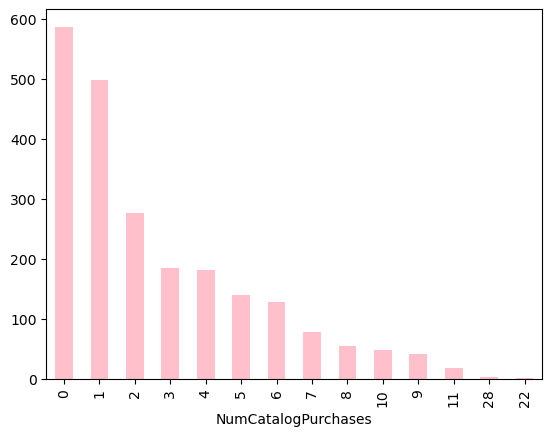

In [37]:
df['NumCatalogPurchases'].value_counts().plot(kind='bar',color='pink')

In [38]:
visits=df.columns.tolist()[16:19]
df[visits]

,NumWebPurchases,NumCatalogPurchases,NumStorePurchases
0,8,10,4
1,1,1,2
2,8,2,10
3,2,0,4
4,5,3,6
...,...,...,...
2235,9,3,4
2236,8,2,5
2237,2,3,13
2238,6,5,10


<Axes: >

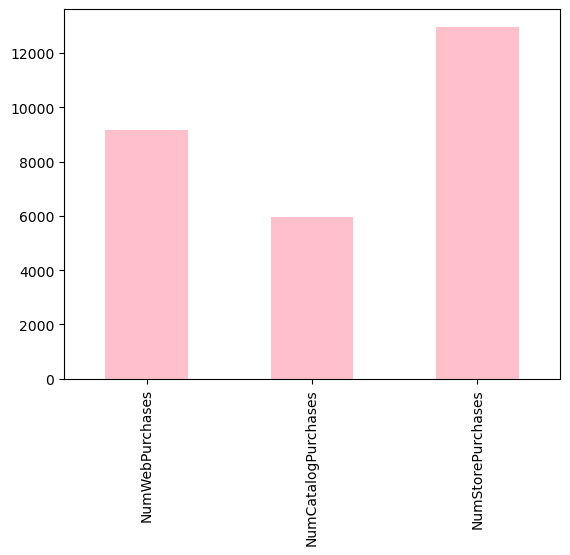

In [39]:
df[visits].sum().plot(kind='bar',color='pink')

In [40]:
pd.crosstab(df.Education, df.Income)

Income,1730.0,2447.0,3502.0,4023.0,4428.0,4861.0,5305.0,5648.0,6560.0,6835.0,...,105471.0,113734.0,153924.0,156924.0,157146.0,157243.0,157733.0,160803.0,162397.0,666666.0
Education,,,,,,,,,,,,,,,,,,,,,
2n Cycle,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Basic,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Graduation,1,1,1,0,1,1,1,0,0,0,...,1,0,1,0,1,0,0,0,0,1
Master,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
PhD,0,0,0,1,0,0,0,1,0,1,...,0,1,0,1,0,1,0,1,1,0


In [41]:
df.groupby("Education").describe()["Income"].mean()

count       448.000000
mean      45947.415983
min        5462.600000
25%       31386.750000
50%       45186.350271
75%       59079.900000
max      223557.600000
std       19353.354315
dtype: float64

In [42]:
df.groupby("Education")["Income"].mean()

Education
2n Cycle      47701.378099
Basic         20306.259259
Graduation    52715.755781
Master        52908.476370
PhD           56105.210405
Name: Income, dtype: float64

In [43]:
df.groupby("Marital_Status")["Income"].mean()

Marital_Status
Absurd      72365.500000
Alone       43789.000000
Divorced    52834.228448
Married     51729.210370
Single      51018.823463
Together    53233.485792
Widow       56426.561706
YOLO        48432.000000
Name: Income, dtype: float64

In [44]:
pd.crosstab(df.Income,df.Teenhome)

Teenhome,0,1,2
Income,,,
1730.0,1,0,0
2447.0,1,0,0
3502.0,1,0,0
4023.0,0,1,0
4428.0,0,1,0
...,...,...,...
157243.0,0,1,0
157733.0,1,0,0
160803.0,1,0,0


In [45]:
df.groupby(visits).describe()

ID                \
                                                      count          mean   
NumWebPurchases NumCatalogPurchases NumStorePurchases                       
0               0                   0                   6.0   8099.000000   
                                    1                   3.0   4842.000000   
                                    3                  28.0   7482.857143   
                1                   0                   1.0  10749.000000   
                                    2                   7.0   3335.857143   
...                                                     ...           ...   
11              10                  11                  2.0   4640.000000   
                11                  5                   1.0   4299.000000   
23              1                   1                   1.0   6237.000000   
25              0                   0                   1.0  10311.000000   
27              0                   0                   2.0   4937.000000   

                                                                          \
                                                           min       25%   
NumWebPurchases NumCatalogPurchases NumStorePurchases                      
0               0                   0                   3955.0   5881.75   
                                    1                   1503.0   2903.00   
                                    3                     73.0   6341.50   
                1                   0                  10749.0  10749.00   
                                    2                    624.0   1484.50   
...                                                        ...       ...   
11              10                  11                  4127.0   4383.50   
                11                  5                   4299.0   4299.00   
23              1                   1                   6237.0   6237.00   
25              0                   0                  10311.0  10311.00   
27              0                   0                   4619.0   4778.00   

                                                                          \
                                                           50%       75%   
NumWebPurchases NumCatalogPurchases NumStorePurchases                      
0               0                   0                   8396.5  10815.25   
                                    1                   4303.0   6511.50   
                                    3                   8255.0   9528.00   
                1                   0                  10749.0  10749.00   
                                    2                   2518.0   4435.50   
...                                                        ...       ...   
11              10                  11                  4640.0   4896.50   
                11                  5                   4299.0   4299.00   
23              1                   1                   6237.0   6237.00   
25              0                   0                  10311.0  10311.00   
27              0                   0                   4937.0   5096.00   

                                                                             \
                                                           max          std   
NumWebPurchases NumCatalogPurchases NumStorePurchases                         
0               0                   0                  11181.0  3069.068588   
                                    1                   8720.0  3638.566064   
                                    3                  10492.0  2776.182467   
                1                   0                  10749.0          NaN   
                                    2                   8369.0  2869.855132   
...                                                        ...          ...   
11              10                  11                  5153.0   725.491557   
                11                  5                   42

In [46]:
df["total_amounts"]=df[amounts].sum(axis=1)
df["total_amounts"]

0       1617
1         27
2        776
3         53
4        422
        ... 
2235    1341
2236     444
2237    1241
2238     843
2239     172
Name: total_amounts, Length: 2240, dtype: int64

In [47]:
df[amounts][0:1].sum(axis=1)

0    1617
dtype: int64

In [48]:
df.groupby("Marital_Status")["total_amounts"].sum()

Marital_Status
Absurd        2385
Alone          770
Divorced    141666
Married     510453
Single      291112
Together    352865
Widow        56889
YOLO           848
Name: total_amounts, dtype: int64

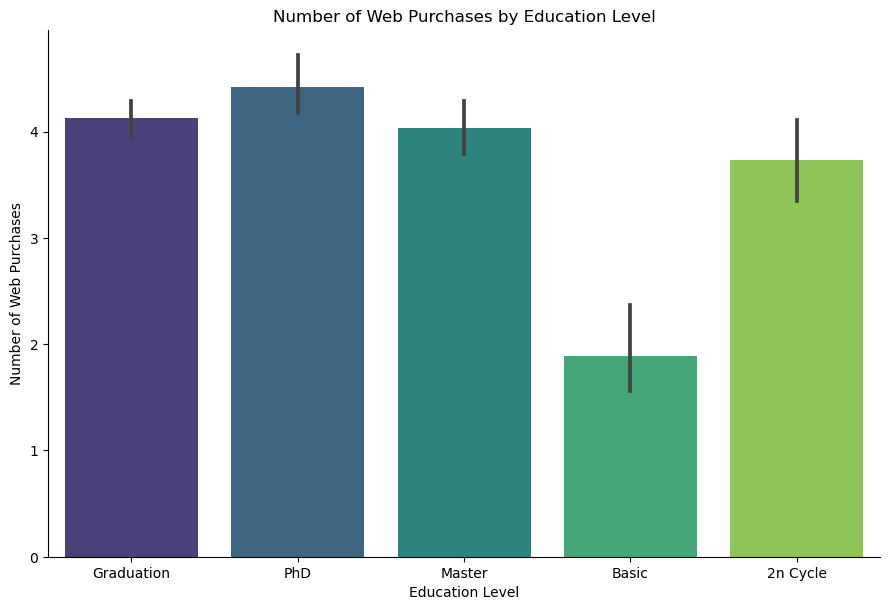

In [49]:
g = sns.catplot(x="Education", y="NumWebPurchases", kind="bar", data=df, height=6, aspect=1.5, palette="viridis")
g.set_ylabels("Number of Web Purchases")
g.set_xlabels("Education Level")
g.set(title="Number of Web Purchases by Education Level")
plt.show()

In [50]:
df.drop(["ID","Year_Birth","Z_CostContact","Z_Revenue","Dt_Customer"], axis=1, inplace=True)

In [51]:
education_ctgrs = pd.Categorical(df["Education"], categories=["Basic", "Graduation", "2n Cycle", "Master", "PhD"], ordered=True)
df["educations"], CAT = pd.factorize(education_ctgrs, sort=True)

In [52]:
df[['Education','educations']]

,Education,educations
0,Graduation,1
1,Graduation,1
2,Graduation,1
3,Graduation,1
4,PhD,4
...,...,...
2235,Graduation,1
2236,PhD,4
2237,Graduation,1
2238,Master,3


In [53]:
df.drop(["Education"],axis=1, inplace=True)
df.head()

,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,total_amounts,educations
0,Single,58138.0,0,0,4252,635,88,546,172,88,...,7,0,0,0,0,0,0,1,1617,1
1,Single,46344.0,1,1,3702,11,1,6,2,1,...,5,0,0,0,0,0,0,0,27,1
2,Together,71613.0,0,0,3901,426,49,127,111,21,...,4,0,0,0,0,0,0,0,776,1
3,Together,26646.0,1,0,3728,11,4,20,10,3,...,6,0,0,0,0,0,0,0,53,1
4,Married,58293.0,1,0,3750,173,43,118,46,27,...,5,0,0,0,0,0,0,0,422,4


In [54]:
df = df.replace(to_replace="Single",value=0)
df = df.replace(to_replace="Divorced",value=0)
df = df.replace(to_replace="Widow",value=0)
df = df.replace(to_replace="Alone",value=0)
df = df.replace(to_replace="Absurd",value=0)
df = df.replace(to_replace="YOLO",value=0)
df = df.replace(to_replace="Married",value=1)
df = df.replace(to_replace="Together",value=1)

In [55]:
df = df.drop(df[df.Income > 400000].index)

In [56]:
pca = PCA(n_components=2, whiten=True)
pca.fit(df)
data_pca = pca.transform(df)
print("Explained Variance Ratios: ", pca.explained_variance_ratio_)
print("Total Explained Variance: ", sum(pca.explained_variance_ratio_))

Explained Variance Ratios:  [9.99408364e-01 4.21819157e-04]
Total Explained Variance:  0.9998301827572521


In [57]:
data_pca

array([[ 0.2891123 , -2.2497778 ],
       [-0.26353011,  1.26902889],
       [ 0.91692912,  0.70815563],
       ...,
       [ 0.23473511, -1.50868381],
       [ 0.80650329,  0.45733602],
       [ 0.04122349,  1.0712852 ]])

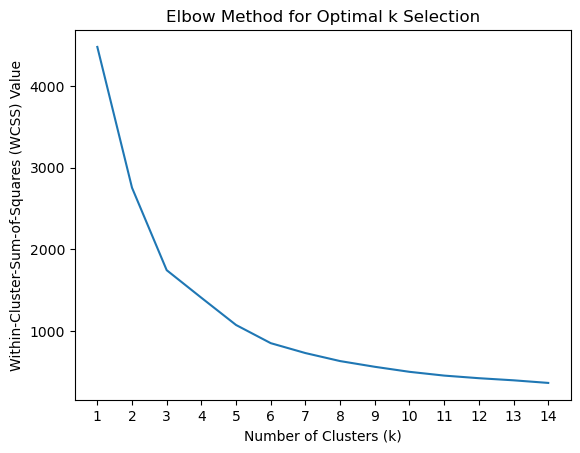

In [58]:
wcss = []
for k in range(1, 15):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(data_pca)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 15), wcss)
plt.xlabel("Number of Clusters (k)")
plt.xticks(range(1, 15, 1))
plt.ylabel("Within-Cluster-Sum-of-Squares (WCSS) Value")
plt.title("Elbow Method for Optimal k Selection")
plt.show()

In [59]:
kmeans2 = KMeans(n_clusters=3)
clusters = kmeans2.fit_predict(data_pca)

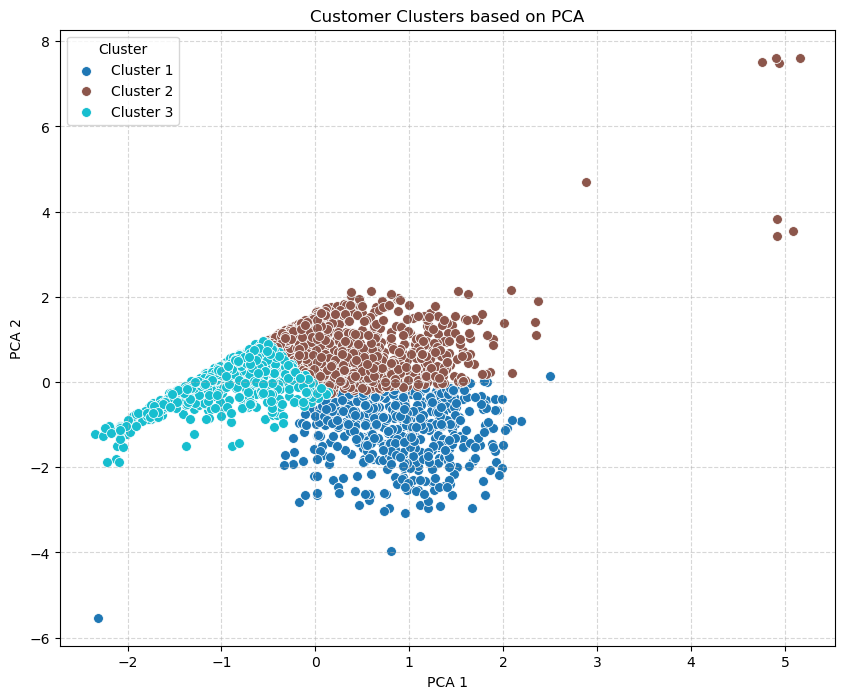

In [61]:
colors = plt.cm.get_cmap('tab10', 3)

# Plotting the customer clusters using seaborn scatter plot
plt.figure(figsize=(10, 8))
for cluster_num in range(3):
    sns.scatterplot(
        x=data_pca[clusters == cluster_num, 0], 
        y=data_pca[clusters == cluster_num, 1], 
        label=f'Cluster {cluster_num + 1}', 
        color=colors(cluster_num),
        s=50  # Adjust marker size for better visibility
    )

# Adding title and labels
plt.title('Customer Clusters based on PCA')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')

# Customize legend
plt.legend(title='Cluster')

# Add grid for better readability
plt.grid(True, linestyle='--', alpha=0.5)

# Show plot
plt.show()